# Breast Cancer Data Analysis

## Introduction


This is an Data Analysis project on Breast Cancer, and the data is fatched from Wisconsin University Hospitals. In this project, I used python as the programming panguage, and I explored the data correlation and data distribution. I also built two models, random forest and logistic regression, trying to find the best fit, and I went through the hyper parameter tuning to check the better result. 

## Business Objective

Find out a model to predict the breast cancer type with the 9 other features. 
Find out the feature importance among the 9.

## Data Clean up

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("breast-cancer-wisconsin.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
df = df.rename(columns={0:'id', 1:'clump',2:'size',3:'shape',4:'marginal',5:'epithelial',6:'bare',7:'bland',8:'normal',9:'mitoses',10:'class'})
df.head()

,id,clump,size,shape,marginal,epithelial,bare,bland,normal,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## EDA

Here is the EDA for the data to explore the data itself, and show how the data looks like.

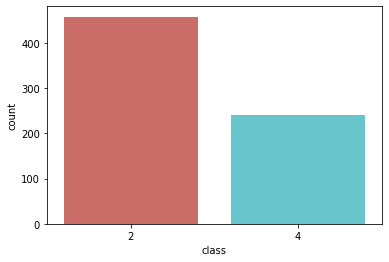

In [3]:
sn.countplot(x=df['class'], palette='hls')
plt.show()

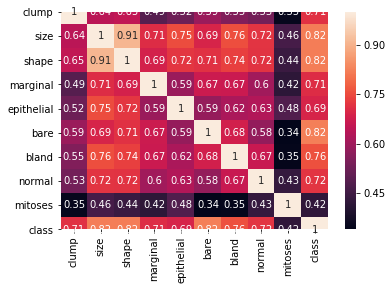

In [4]:
data = df.loc[:, df.columns != 'id']
data = data[data['bare'] != '?']
data['bare'] = pd.to_numeric(data['bare'])
crmax = data.corr()
sn.heatmap(crmax, annot=True)
plt.rcParams["figure.figsize"]=(16,8)
plt.show()

Here you can see that the size and shape are highly related each other and they are highly related to class. 

Text(0.5, 1, 'Features correlating with Class')

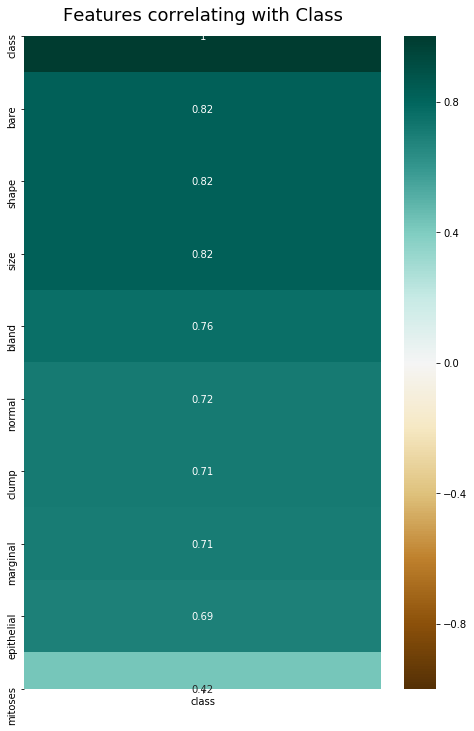

In [5]:
plt.figure(figsize=(8,12))
heatmap = sn.heatmap(data.corr()[['class']].sort_values(by='class', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features correlating with Class', fontdict={'fontsize':18}, pad=16)


Here is a ranking of correlation between the features and the class, the deeper and higher position, the higher correlationship.

In [6]:
data.describe()

,clump,size,shape,marginal,epithelial,bare,bland,normal,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Here is a distribution sample of shape and bland features.

(array([150., 160., 161.,  39.,  34.,   9.,  71.,  28.,  11.,  20.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

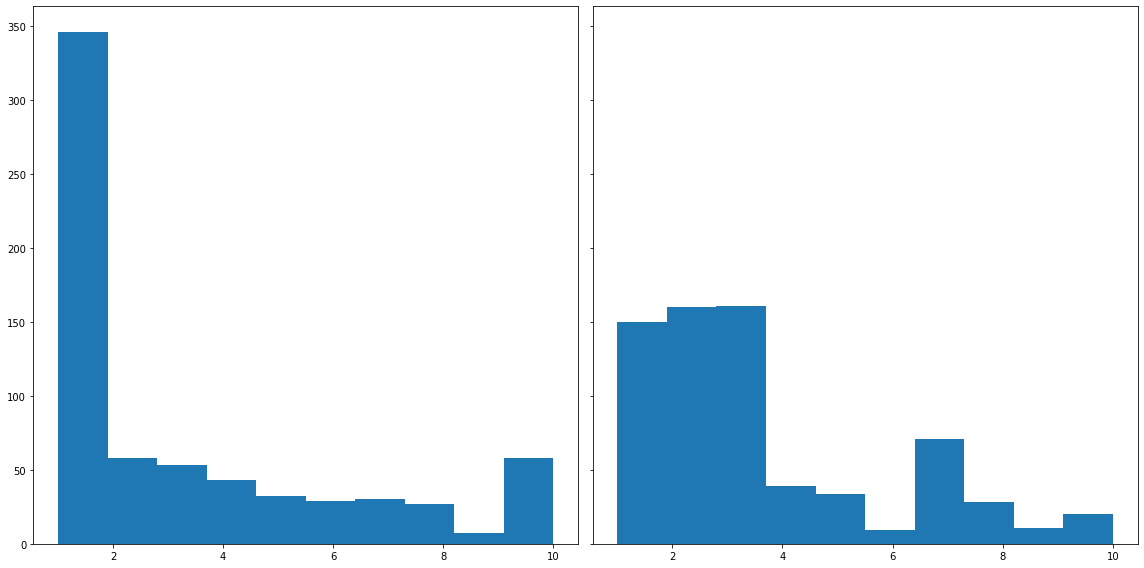

In [7]:
plt.rcParams["figure.figsize"]=(16,8)
fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)
axs[0].hist(data['shape'])
axs[1].hist(data['bland'])

## Random Forest Model

Random Forest Classification is a supervised machine learning method, and it randomly samples the features and build the decision tree. In addition, there is a build-in fitting system allowing the model choose the best fit by calculating the out of bag error. Because it is randomly selecting the features, it does not need to worry about the overfitting problem. 

In [27]:
from sklearn.model_selection import train_test_split
target = data['class']
features = data.loc[:, data.columns != 'class']
train_features, test_features, train_labels, test_labels = train_test_split(features, target, test_size=0.2, random_state=42 )

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(train_features, train_labels)

rfc_predict = rfc.predict(test_features)
rfc.fit

<bound method BaseForest.fit of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(test_labels, rfc_predict))
print(accuracy_score(test_labels, rfc_predict))

[[78  1]
 [ 6 52]]
0.948905109489051


Above is the accuarcy on test set, and this is a good result, but I do want to go through the hyper parameters tuning with grid to see if I can get even better result. 

In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num =10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf=[1,2,4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(train_features, train_labels)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   18.4s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=20,
                                                    n_jobs=None,
  

Here is the parameters in the best fit, and the best result. 

In [21]:
print(rf_random.best_params_, rf_random.best_score_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True} 0.9688644688644689


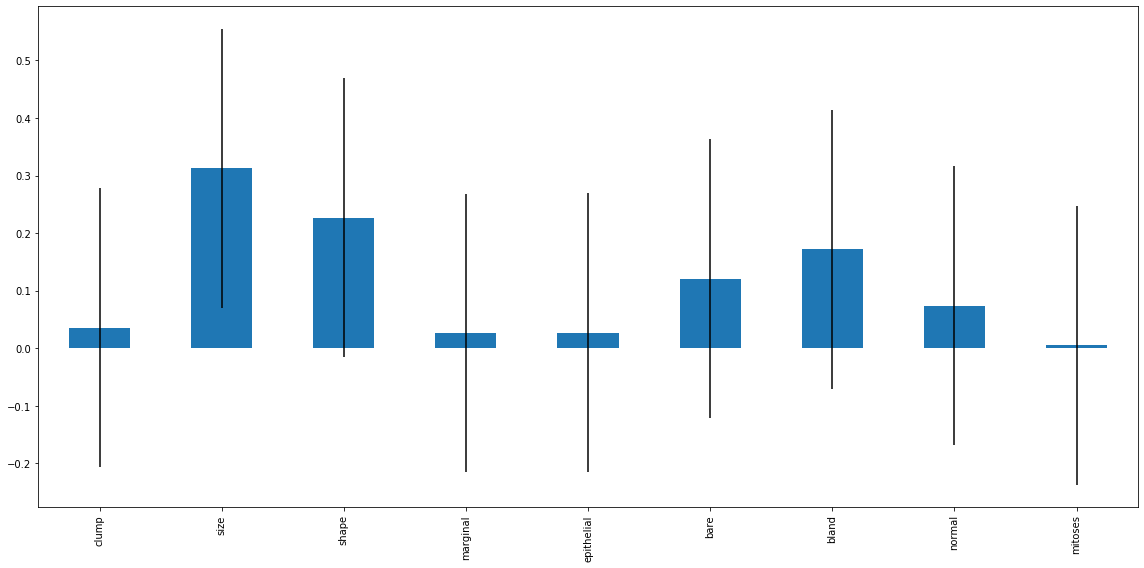

In [22]:
import numpy as np
rfbest = RandomForestClassifier(n_estimators=100, min_samples_split= 5, min_samples_leaf=4, max_features='auto', max_depth=10, bootstrap= True)
rfbest.fit(train_features, train_labels)

names = features.columns
importances = rfbest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfbest.estimators_])
forest_importances = pd.Series(importances, index = names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
fig.tight_layout()

Here are the feature importances, the highest importance is uniformity cell size, and the lowest feature is mitoses. 

## Logistic Regression

Logistic Regression is a supervised amchine learning, and usually it is used in binary outcomes.In addition, I went through the hyper parameter tuning as well, in order to get a better result.

In [24]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=0, solver='lbfgs').fit(train_features, train_labels)
lr_predict = lr.predict(test_features)
print(accuracy_score(test_labels, lr_predict))
print(confusion_matrix(test_labels, lr_predict))

0.9562043795620438
[[78  1]
 [ 5 53]]


Above is the Logistic Regression result on test dataset. The result looks good, and below is the hyper tuning process for better result. 

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10,1,0.1,0.01]
lggrid = dict(solver = solvers, penalty = penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search=GridSearchCV(estimator=model, param_grid=lggrid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(train_features, train_labels)

Below is the better fit after hyper tuning.

In [25]:
print(grid_result.best_score_, grid_result.best_params_)

0.9688644688644689 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


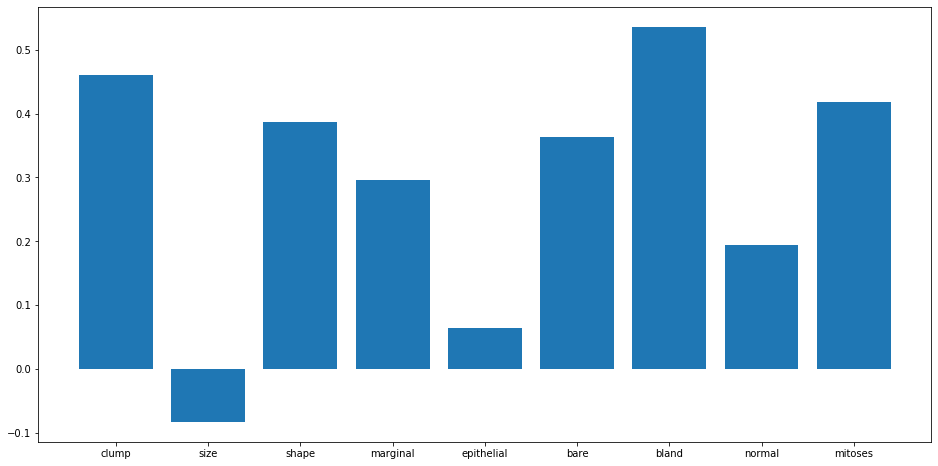

In [18]:
lgbest = LogisticRegression(C= 10, penalty='l2', solver= 'newton-cg')
lgbest.fit(train_features, train_labels)

lgimportances = lgbest.coef_[0]
plt.bar([x for x in range(len(lgimportances))], lgimportances)
plt.xticks(np.arange(len(names)), names)
plt.show()

Above are the feature importances, the highest one is bland, and the lowest is epithelial. 

## Conclusion

The best fit model result is 0.9707 from hyper tuned random forest model. I do think this is a good result predicting the dataset. The most important features is unirformity of cell size. 
The result might differ each time you run it for random forest, because it is randonly select the decison tree.

## Reference

Section, Introduction to Random Forest in Machine Learning, from https://www.section.io/engineering-education/introduction-to-random-forest-in-machine-learning/

Dr. William Wolberg, Breast Cancer Wisconsin Data Set, from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

National Cancer Institute, Cancer Stat Facts: Femal Breast Cancer from https://seer.cancer.gov/statfacts/html/breast.html​

Mayo Clinic, Creast cancer, from https://www.cancer.org/cancer/breast-cancer/risk-and-prevention/breast-cancer-risk-factors-you-cannot-change.html
